In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('KSI_Clean_Dummies.csv')
X = df.drop(['ACCLASS'], axis=1)
y = df.ACCLASS

In [3]:
def get_ROC_Curve(X, y, clf):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    model = clf.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, pred_train)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, pred_test)

    plt.grid()

    plt.plot(train_fpr, train_tpr, label="AUC TRAIN: "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="AUC TEST: "+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.show()


Mean PPV for RF: 0.998

Mean NPV for RF: 0.951

Mean Specificity for RF: 1.000

Mean Sensitivity for RF: 0.677

Mean Accuracy for RF: 0.956


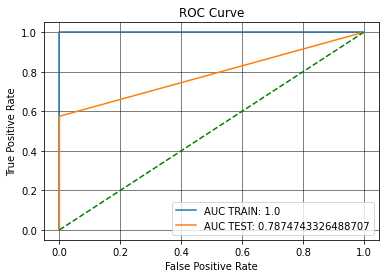

In [4]:
clf_RF = RandomForestClassifier()
cv_RF = KFold(n_splits=10, random_state=42, shuffle=True)
fold_count_RF = 0
sum_ppv_RF = 0
sum_npv_RF = 0
sum_spec_RF = 0
sum_sen_RF = 0
sum_acc_RF = 0

for train_index, test_index in cv_RF.split(X):
    model_RF = clf_RF.fit(X.iloc[train_index], y.iloc[train_index])
    pred_RF = model_RF.predict(X.iloc[test_index])
#     print(f'\nFold {fold_count_RF}/10')
    tn, fp, fn, tp = confusion_matrix(y.iloc[test_index], pred_RF).ravel()
#     cm_RF = confusion_matrix(y[test_index], pred_RF)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=clf_RF.classes_)
#     disp.plot()
#     plt.show()
    if tp + fp == 0:
        ppv_RF = 0
    else:        
        ppv_RF = tp / (tp + fp)
        
    if tn + fn == 0:
        npv_RF = 0
    else:
        npv_RF = tn / (tn + fn)
        
    spec_RF = tn / (tn + fp)
    sen_RF = tp / (tp + fn)
    acc_RF = accuracy_score(y.iloc[test_index], pred_RF)
    sum_ppv_RF = sum_ppv_RF + ppv_RF
    sum_npv_RF = sum_npv_RF + npv_RF
    sum_spec_RF = sum_spec_RF + spec_RF
    sum_sen_RF = sum_sen_RF + sen_RF
    sum_acc_RF = sum_acc_RF + acc_RF
    fold_count_RF = fold_count_RF + 1
   
avg_ppv_RF = sum_ppv_RF / fold_count_RF
avg_npv_RF = sum_npv_RF / fold_count_RF
avg_spec_RF = sum_spec_RF / fold_count_RF
avg_sen_RF = sum_sen_RF / fold_count_RF
avg_acc_RF = sum_acc_RF / fold_count_RF

print('\nMean PPV for RF: %.3f' % avg_ppv_RF)
print('\nMean NPV for RF: %.3f' % avg_npv_RF)
print('\nMean Specificity for RF: %.3f' % avg_spec_RF)
print('\nMean Sensitivity for RF: %.3f' % avg_sen_RF)
print('\nMean Accuracy for RF: %.3f' % avg_acc_RF)

get_ROC_Curve(X, y, clf_RF)


Mean PPV for DT: 0.904

Mean NPV for DT: 0.983

Mean Specificity for DT: 0.985

Mean Sensitivity for DT: 0.890

Mean Accuracy for DT: 0.972


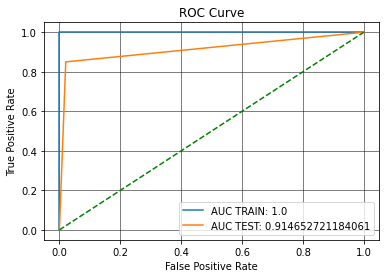

In [5]:
clf_DT = DecisionTreeClassifier()
cv_DT = KFold(n_splits=10, random_state=42, shuffle=True)
fold_count_DT = 0
sum_ppv_DT = 0
sum_npv_DT = 0
sum_spec_DT = 0
sum_sen_DT = 0
sum_acc_DT = 0

for train_index, test_index in cv_DT.split(X):
    model_DT = clf_DT.fit(X.iloc[train_index], y.iloc[train_index])
    pred_DT = model_DT.predict(X.iloc[test_index])
#     print(f'\nFold {fold_count_DT}/10')
    tn, fp, fn, tp = confusion_matrix(y.iloc[test_index], pred_DT).ravel()
#     cm_DT = confusion_matrix(y[test_index], pred_DT)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=clf_DT.classes_)
#     disp.plot()
#     plt.show()
    if tp + fp == 0:
        ppv_DT = 0
    else:        
        ppv_DT = tp / (tp + fp)
        
    if tn + fn == 0:
        npv_DT = 0
    else:
        npv_DT = tn / (tn + fn)
        
    spec_DT = tn / (tn + fp)
    sen_DT = tp / (tp + fn)
    acc_DT = accuracy_score(y.iloc[test_index], pred_DT)
    sum_ppv_DT = sum_ppv_DT + ppv_DT
    sum_npv_DT = sum_npv_DT + npv_DT
    sum_spec_DT = sum_spec_DT + spec_DT
    sum_sen_DT = sum_sen_DT + sen_DT
    sum_acc_DT = sum_acc_DT + acc_DT
    fold_count_DT = fold_count_DT + 1
   
avg_ppv_DT = sum_ppv_DT / fold_count_DT
avg_npv_DT = sum_npv_DT / fold_count_DT
avg_spec_DT = sum_spec_DT / fold_count_DT
avg_sen_DT = sum_sen_DT / fold_count_DT
avg_acc_DT = sum_acc_DT / fold_count_DT

print('\nMean PPV for DT: %.3f' % avg_ppv_DT)
print('\nMean NPV for DT: %.3f' % avg_npv_DT)
print('\nMean Specificity for DT: %.3f' % avg_spec_DT)
print('\nMean Sensitivity for DT: %.3f' % avg_sen_DT)
print('\nMean Accuracy for DT: %.3f' % avg_acc_DT)

get_ROC_Curve(X, y, clf_DT)


Mean PPV for XGB: 0.972

Mean NPV for XGB: 0.940

Mean Specificity for XGB: 0.997

Mean Sensitivity for XGB: 0.595

Mean Accuracy for XGB: 0.942


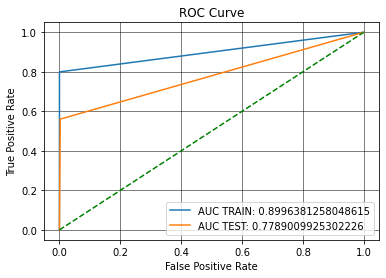

In [6]:
clf_XGB = xgb.XGBClassifier()

cv_XGB = KFold(n_splits=10, random_state=42, shuffle=True)
fold_count_XGB = 0
sum_ppv_XGB = 0
sum_npv_XGB = 0
sum_spec_XGB = 0
sum_sen_XGB = 0
sum_acc_XGB = 0

for train_index, test_index in cv_XGB.split(X):
    model_XGB = clf_XGB.fit(X.iloc[train_index], y.iloc[train_index])
    pred_XGB = model_XGB.predict(X.iloc[test_index])
#     print(f'\nFold {fold_count_XGB}/10')
    tn, fp, fn, tp = confusion_matrix(y.iloc[test_index], pred_XGB).ravel()
    ppv_XGB = tp / (tp + fp)
    npv_XGB = tn / (tn + fn)
    spec_XGB = tn / (tn + fp)
    sen_XGB = tp / (tp + fn)
    acc_XGB = accuracy_score(y.iloc[test_index], pred_XGB)
    sum_ppv_XGB = sum_ppv_XGB + ppv_XGB
    sum_npv_XGB = sum_npv_XGB + npv_XGB
    sum_spec_XGB = sum_spec_XGB + spec_XGB
    sum_sen_XGB = sum_sen_XGB + sen_XGB
    sum_acc_XGB = sum_acc_XGB + acc_XGB
    fold_count_XGB = fold_count_XGB + 1
   
avg_ppv_XGB = sum_ppv_XGB / fold_count_XGB
avg_npv_XGB = sum_npv_XGB / fold_count_XGB
avg_spec_XGB = sum_spec_XGB / fold_count_XGB
avg_sen_XGB = sum_sen_XGB / fold_count_XGB
avg_acc_XGB = sum_acc_XGB / fold_count_XGB

print('\nMean PPV for XGB: %.3f' % avg_ppv_XGB)
print('\nMean NPV for XGB: %.3f' % avg_npv_XGB)
print('\nMean Specificity for XGB: %.3f' % avg_spec_XGB)
print('\nMean Sensitivity for XGB: %.3f' % avg_sen_XGB)
print('\nMean Accuracy for XGB: %.3f' % avg_acc_XGB)

get_ROC_Curve(X, y, clf_XGB)

Mean PPV for KNN : 0.653

Mean NPV for KNN: 0.924

Mean Specificity for KNN: 0.958

Mean Sensitivity for KNN: 0.503

Mean Accuracy for KNN: 0.895


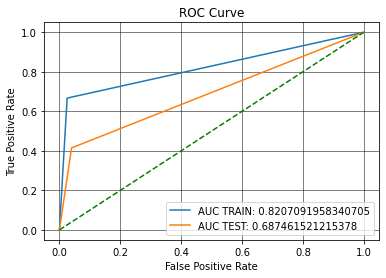

In [7]:
clf_KNN = KNeighborsClassifier(metric='euclidean')
cv_KNN = KFold(n_splits=10, random_state=42, shuffle=True)
fold_count_KNN = 0
sum_ppv_KNN = 0
sum_npv_KNN = 0
sum_spec_KNN = 0
sum_sen_KNN = 0
sum_acc_KNN = 0

for train_index, test_index in cv_KNN.split(X):
    model_KNN = clf_KNN.fit(X.iloc[train_index], y.iloc[train_index])
    pred_KNN = model_KNN.predict(X.iloc[test_index])
#     print(f'\nFold {fold_count_KNN}/10')
    tn, fp, fn, tp = confusion_matrix(y.iloc[test_index], pred_KNN).ravel()
    ppv_KNN = tp / (tp + fp)
    npv_KNN = tn / (tn + fn)
    spec_KNN = tn / (tn + fp)
    sen_KNN = tp / (tp + fn)
    acc_KNN = accuracy_score(y.iloc[test_index], pred_KNN)
    sum_ppv_KNN = sum_ppv_KNN + ppv_KNN
    sum_npv_KNN = sum_npv_KNN + npv_KNN
    sum_spec_KNN = sum_spec_KNN + spec_KNN
    sum_sen_KNN = sum_sen_KNN + sen_KNN
    sum_acc_KNN = sum_acc_KNN + acc_KNN
    fold_count_KNN = fold_count_KNN + 1

avg_ppv_KNN = sum_ppv_KNN / fold_count_KNN
avg_npv_KNN = sum_npv_KNN / fold_count_KNN
avg_spec_KNN = sum_spec_KNN / fold_count_KNN
avg_sen_KNN = sum_sen_KNN / fold_count_KNN
avg_acc_KNN = sum_acc_KNN / fold_count_KNN

print('Mean PPV for KNN : %.3f' % avg_ppv_KNN)
print('\nMean NPV for KNN: %.3f' % avg_npv_KNN)
print('\nMean Specificity for KNN: %.3f' % avg_spec_KNN)
print('\nMean Sensitivity for KNN: %.3f' % avg_sen_KNN)
print('\nMean Accuracy for KNN: %.3f' % avg_acc_KNN)

get_ROC_Curve(X, y, clf_KNN)


Mean PPV for MLP: 0.028

Mean NPV for MLP: 0.882

Mean Specificity for MLP: 0.801

Mean Sensitivity for MLP: 0.200

Mean Accuracy for MLP: 0.720


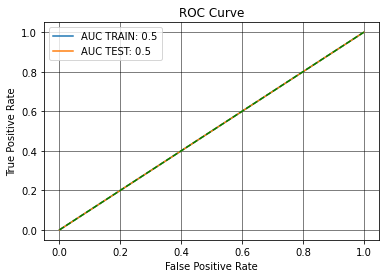

In [8]:
clf_MLP = MLPClassifier(solver='adam', max_iter=1000)
cv_MLP = KFold(n_splits=10, random_state=42, shuffle=True)

fold_count_MLP = 0
sum_ppv_MLP = 0
sum_npv_MLP = 0
sum_spec_MLP = 0
sum_sen_MLP = 0
sum_acc_MLP = 0

for train_index, test_index in cv_MLP.split(X):
    model_MLP = clf_MLP.fit(X.iloc[train_index], y.iloc[train_index])
    pred_MLP = model_MLP.predict(X.iloc[test_index])
#     print(f'\nFold {fold_count_MLP}/10')
    tn, fp, fn, tp = confusion_matrix(y.iloc[test_index], pred_MLP).ravel()
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_MLP.classes_)
#     disp.plot()
#     plt.show()
    if tp + fp == 0:
        ppv_MLP = 0
    else:        
        ppv_MLP = tp / (tp + fp)
        
    if tn + fn == 0:
        npv_MLP = 0
    else:
        npv_MLP = tn / (tn + fn)
        
    spec_MLP = tn / (tn + fp)
    sen_MLP = tp / (tp + fn)
    acc_MLP = accuracy_score(y.iloc[test_index], pred_MLP)
    sum_ppv_MLP = sum_ppv_MLP + ppv_MLP
    sum_npv_MLP = sum_npv_MLP + npv_MLP
    sum_spec_MLP = sum_spec_MLP + spec_MLP
    sum_sen_MLP = sum_sen_MLP + sen_MLP
    sum_acc_MLP = sum_acc_MLP + acc_MLP
    fold_count_MLP = fold_count_MLP + 1
   
avg_ppv_MLP = sum_ppv_MLP / fold_count_MLP
avg_npv_MLP = sum_npv_MLP / fold_count_MLP
avg_spec_MLP = sum_spec_MLP / fold_count_MLP
avg_sen_MLP = sum_sen_MLP / fold_count_MLP
avg_acc_MLP = sum_acc_MLP / fold_count_MLP

print('\nMean PPV for MLP: %.3f' % avg_ppv_MLP)
print('\nMean NPV for MLP: %.3f' % avg_npv_MLP)
print('\nMean Specificity for MLP: %.3f' % avg_spec_MLP)
print('\nMean Sensitivity for MLP: %.3f' % avg_sen_MLP)
print('\nMean Accuracy for MLP: %.3f' % avg_acc_MLP)

get_ROC_Curve(X, y, clf_MLP)

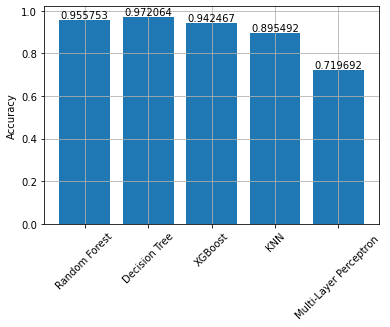

In [9]:
clfs = ('Random Forest', 'Decision Tree', 'XGBoost', 'KNN', 'Multi-Layer Perceptron ')
y_pos = np.arange(len(clfs))
performance = [avg_acc_RF, avg_acc_DT, avg_acc_XGB, avg_acc_KNN, avg_acc_MLP]

fig, ax = plt.subplots()
plt.grid()
chart = ax.bar(y_pos, performance)
plt.xticks(y_pos, clfs, rotation=45)
plt.ylabel('Accuracy')
ax.bar_label(chart)

plt.show()